# Лабораторна робота №2  
## Основи роботи з сигналами в Python

**Студент:** Ярмішко Герман
**Група:** КІ-23-1
**Середовище:** Yarmishko_OpenCV

**Мета роботи:**  
Ознайомитись з основами моделювання періодичних сигналів у Python та їх апроксимацією за допомогою ряду Фур’є.


## Завдання 1

### Формування сигналу в Python(1.1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 1
T = 1
t1 = T / 4
t2 = T / 2

def signal(t):
    t_mod = np.mod(t, T)
    y = np.zeros_like(t_mod)

    y = np.where((t_mod >= t1) & (t_mod <= t2), t_mod - t1, y)
    y = np.where((t_mod > t2) & (t_mod <= t2 + t1), t2 + t1 - t_mod, y)

    return y
    
print("Параметри сигналу:")
print(f"T = {T}")
print(f"A = {A}")
print(f"t1 = {t1}")
print(f"t2 = {t2}")


Параметри сигналу:
T = 1
A = 1
t1 = 0.25
t2 = 0.5


### Візуалізація періодичного сигналу(1.2)

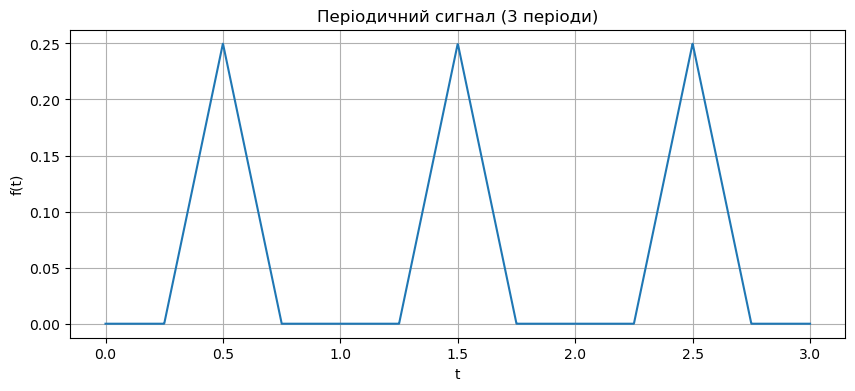

Побудовано графік періодичного сигналу для 3 періодів.


In [2]:
t = np.linspace(0, 3*T, 2000)
y = signal(t)

plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title("Періодичний сигнал (3 періоди)")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.show()
print("Побудовано графік періодичного сигналу для 3 періодів.")

### Розклад у тригонометричний ряд Фур’є(1.3)

Розклад сигналу виконується у вигляді тригонометричного ряду Фур’є:

$$
f(t) = \frac{a_0}{2} + \sum_{k=1}^{N}
\left(
a_k \cos(k\omega_0 t) + b_k \sin(k\omega_0 t)
\right),
$$

де
$$
\omega_0 = \frac{2\pi}{T}.
$$


In [3]:
N = 8
w0 = 2 * np.pi / T

t_int = np.linspace(0, T, 5000)
f_int = signal(t_int)

a = np.zeros(N+1)
b = np.zeros(N+1)

a[0] = 2 / T * np.trapezoid(f_int, t_int)

for k in range(1, N+1):
    a[k] = 2 / T * np.trapezoid(
        f_int * np.cos(k * w0 * t_int),
        t_int
    )
    b[k] = 2 / T * np.trapezoid(
        f_int * np.sin(k * w0 * t_int),
        t_int
    )

a, b
print(f"a0 = {a[0]:.4f}")
print("ak (k=1..5):", ["{:.4f}".format(val) for val in a[1:6]])
print("bk (k=1..5):", ["{:.4e}".format(val) for val in b[1:6]])

a0 = 0.1250
ak (k=1..5): ['-0.1013', '0.0507', '-0.0113', '-0.0000', '-0.0041']
bk (k=1..5): ['1.7347e-17', '-1.3878e-17', '-6.9389e-18', '-3.4694e-18', '-1.7347e-18']


Отримані коефіцієнти тригонометричного ряду Фур’є є коректними.
Синусні коефіцієнти $( b_k )$ мають значення, близькі до нуля,
що пояснюється симетрією сигналу. Зменшення амплітуд коефіцієнтів
$( a_k )$ зі зростанням номера гармоніки свідчить про хорошу
збіжність ряду Фур’є.

### Розклад у тригонометричний ряд Фур’є(1.4)

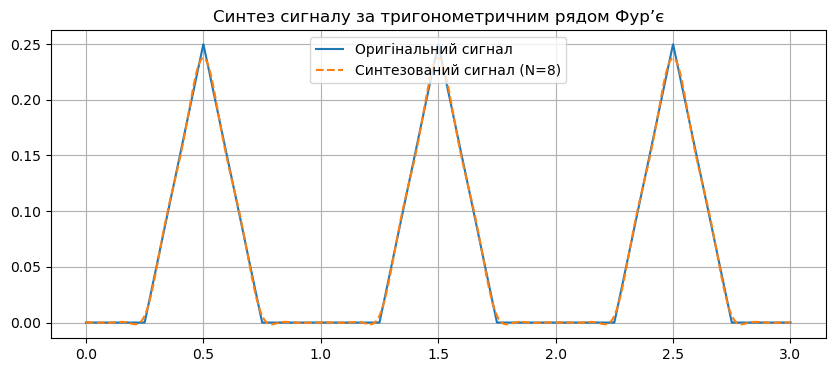

Синтез сигналу виконано з використанням N = 8 гармонік.


In [4]:
y_fs = a[0] / 2

for k in range(1, N+1):
    y_fs += a[k] * np.cos(k * w0 * t) + b[k] * np.sin(k * w0 * t)

plt.figure(figsize=(10, 4))
plt.plot(t, y, label="Оригінальний сигнал")
plt.plot(t, y_fs, '--', label="Синтезований сигнал (N=8)")
plt.legend()
plt.grid(True)
plt.title("Синтез сигналу за тригонометричним рядом Фур’є")
plt.show()
print(f"Синтез сигналу виконано з використанням N = {N} гармонік.")

### Спектр коефіцієнтів $( a_k )$, $( b_k )$ (1.5)

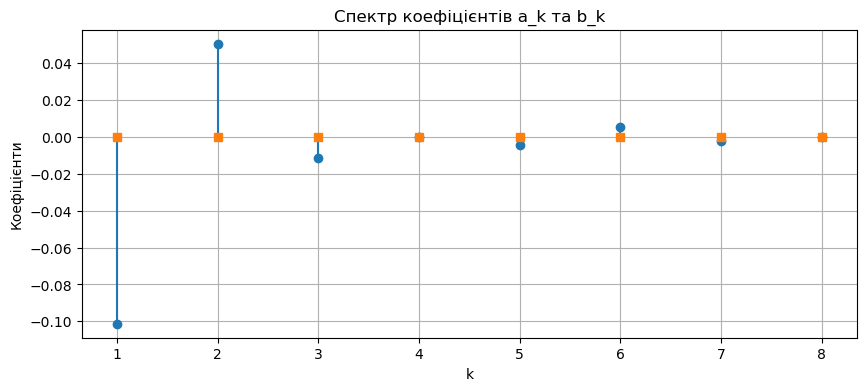

In [5]:
k = np.arange(1, N+1)

plt.figure(figsize=(10, 4))
plt.stem(k, a[1:], linefmt='C0-', markerfmt='C0o', basefmt=" ")
plt.stem(k, b[1:], linefmt='C1-', markerfmt='C1s', basefmt=" ")
plt.xlabel("k")
plt.ylabel("Коефіцієнти")
plt.title("Спектр коефіцієнтів a_k та b_k")
plt.grid(True)
plt.show()

## Амплітудно-фазова форма ряду Фур’є(1.6)

Тригонометричний ряд Фур’є може бути записаний в амплітудно-фазовій формі:

$$
f(t) = \frac{a_0}{2} + \sum_{k=1}^{N} A_k \cos(k\omega_0 t + \varphi_k),
$$

де амплітуда та фаза визначаються як:

$$
A_k = \sqrt{a_k^2 + b_k^2}, \qquad
\varphi_k = \arctan\left(\frac{-b_k}{a_k}\right).
$$

### Обчислення $(A_k)$ та $(φ_k)$(1.6.1)

In [6]:
Ak = np.sqrt(a[1:]**2 + b[1:]**2)
phi_k = np.arctan2(-b[1:], a[1:])

Ak, phi_k
print("Ak (k=1..5):", ["{:.4f}".format(val) for val in Ak[:5]])
print("phi_k (k=1..5):", ["{:.4f}".format(val) for val in phi_k[:5]])


Ak (k=1..5): ['0.1013', '0.0507', '0.0113', '0.0000', '0.0041']
phi_k (k=1..5): ['-3.1416', '0.0000', '3.1416', '3.1416', '3.1416']


### Амплітудний спектр(1.6.2)

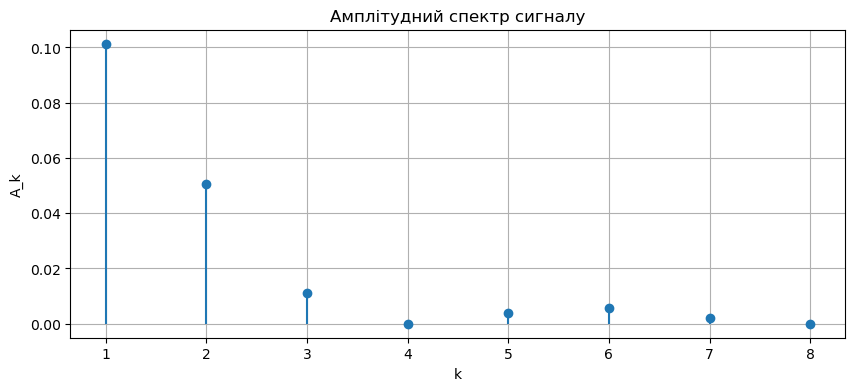

In [7]:
k = np.arange(1, N+1)

plt.figure(figsize=(10, 4))
plt.stem(k, Ak, basefmt=" ")
plt.xlabel("k")
plt.ylabel("A_k")
plt.title("Амплітудний спектр сигналу")
plt.grid(True)
plt.show()

### Фазовий спектр(1.6.3)

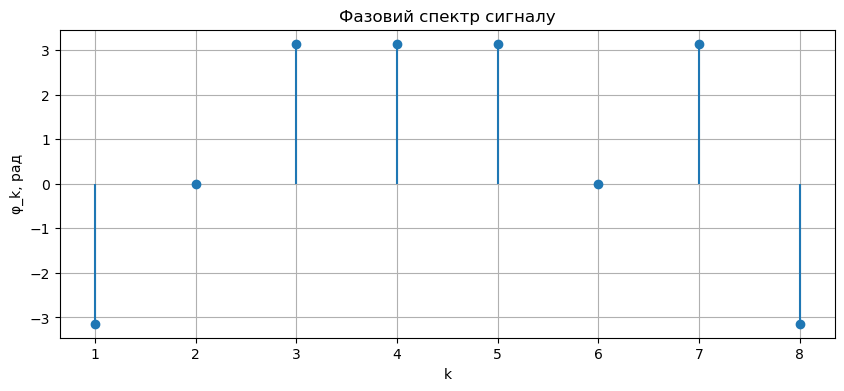

In [8]:
plt.figure(figsize=(10, 4))
plt.stem(k, phi_k, basefmt=" ")
plt.xlabel("k")
plt.ylabel("φ_k, рад")
plt.title("Фазовий спектр сигналу")
plt.grid(True)
plt.show()

## Комплексний ряд Фур’є(1.7)

Комплексний ряд Фур’є має вигляд:

$$
f(t) = \sum_{k=-N}^{N} C_k e^{jk\omega_0 t},
$$

де комплексні коефіцієнти визначаються як:

$$
C_k = \frac{1}{2}(a_k - jb_k), \quad
C_{-k} = \frac{1}{2}(a_k + jb_k).
$$


### Обчислення комплексних коефіцієнтів(1.7.1)

In [9]:
Ck_pos = 0.5 * (a[1:] - 1j * b[1:])
Ck_neg = 0.5 * (a[1:] + 1j * b[1:])

Ck_pos
print("Перші комплексні коефіцієнти Ck (k=1..5):")
for i in range(5):
    print(f"C[{i+1}] = {Ck_pos[i]:.4f}")

Перші комплексні коефіцієнти Ck (k=1..5):
C[1] = -0.0507-0.0000j
C[2] = 0.0253+0.0000j
C[3] = -0.0056+0.0000j
C[4] = -0.0000+0.0000j
C[5] = -0.0020+0.0000j


### Амплітудний та фазовий спектри(1.7.2)

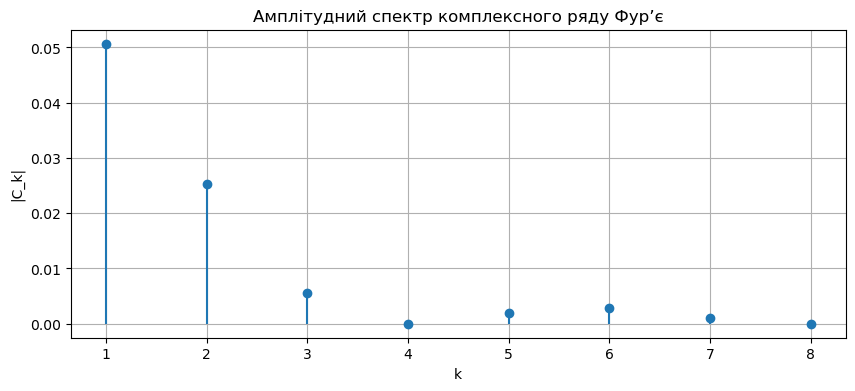

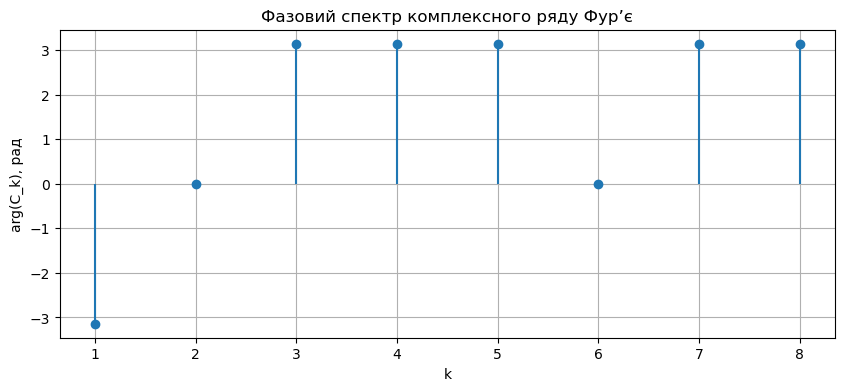

In [10]:
Ck_amp = np.abs(Ck_pos)
Ck_phase = np.angle(Ck_pos)

plt.figure(figsize=(10, 4))
plt.stem(k, Ck_amp, basefmt=" ")
plt.xlabel("k")
plt.ylabel("|C_k|")
plt.title("Амплітудний спектр комплексного ряду Фур’є")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(k, Ck_phase, basefmt=" ")
plt.xlabel("k")
plt.ylabel("arg(C_k), рад")
plt.title("Фазовий спектр комплексного ряду Фур’є")
plt.grid(True)
plt.show()

### Синтез сигналу за комплексним рядом(1.7.3)

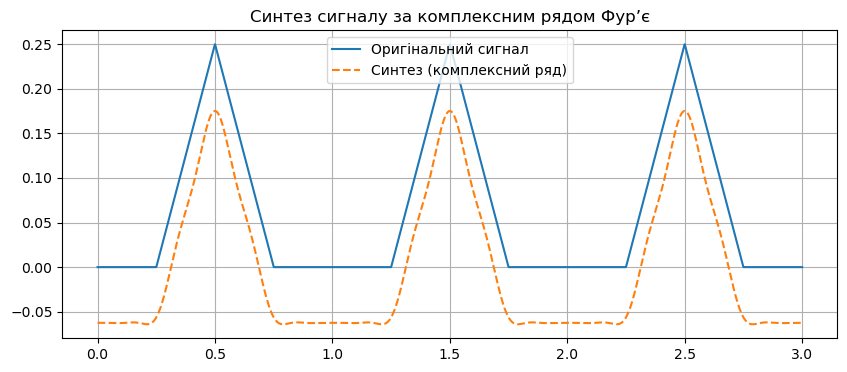

In [11]:
y_complex = np.zeros_like(t, dtype=complex)

for i in range(N):
    y_complex += Ck_pos[i] * np.exp(1j * (i+1) * w0 * t)
    y_complex += Ck_neg[i] * np.exp(-1j * (i+1) * w0 * t)

y_complex = np.real(y_complex)

plt.figure(figsize=(10, 4))
plt.plot(t, y, label="Оригінальний сигнал")
plt.plot(t, y_complex, '--', label="Синтез (комплексний ряд)")
plt.legend()
plt.grid(True)
plt.title("Синтез сигналу за комплексним рядом Фур’є")
plt.show()

## Завдання 2

### Синтез сигналу за тригонометричним рядом Фур’є

In [12]:
y_fourier = a[0] / 2

for k in range(1, N + 1):
    y_fourier += (
        a[k] * np.cos(k * w0 * t) +
        b[k] * np.sin(k * w0 * t)
    )

print(f"Синтез сигналу за тригонометричним рядом Фур’є виконано (N = {N}).")


Синтез сигналу за тригонометричним рядом Фур’є виконано (N = 8).


### Реалізація функцій Уолша–Пелі

def walsh_paley(k, n):
    """
    k — номер функції
    n — кількість відліків (ступінь двійки)
    """
    binary = np.binary_repr(k, width=int(np.log2(n)))
    t = np.arange(n)
    result = np.ones(n)

    for i, bit in enumerate(binary):
        if bit == '1':
            result *= np.sign(np.sin(2**i * np.pi * t / n))
    return result

### Обчислення коефіцієнтів Уолша–Пелі

In [13]:
def walsh_paley(k, n):
    """
    Функція Уолша–Пелі
    k — номер базисної функції
    n — кількість відліків (2^M)
    """
    t = np.arange(n)
    result = np.ones(n)

    binary = np.binary_repr(k, width=int(np.log2(n)))

    for i, bit in enumerate(binary):
        if bit == '1':
            result *= np.sign(np.sin(2**i * np.pi * t / n))

    return result

In [14]:
M = 3               
n = 2 ** M

t_w = np.linspace(0, T, n, endpoint=False)
f_w = signal(t_w)

c = np.zeros(n)

for k in range(n):
    w = walsh_paley(k, n)
    c[k] = np.dot(f_w, w) / n

print("Коефіцієнти Уолша–Пелі:")
print(["{:.4f}".format(val) for val in c])


Коефіцієнти Уолша–Пелі:
['0.0625', '-0.0312', '0.0312', '-0.0625', '0.0625', '-0.0312', '0.0312', '-0.0625']


### Синтез сигналу в базисі Уолша–Пелі

In [15]:
y_walsh = np.zeros(n)

for k in range(n):
    y_walsh += c[k] * walsh_paley(k, n)

print("Синтез сигналу за базисом Уолша–Пелі виконано.")

Синтез сигналу за базисом Уолша–Пелі виконано.


### Порівняння всіх сигналів на одному графіку

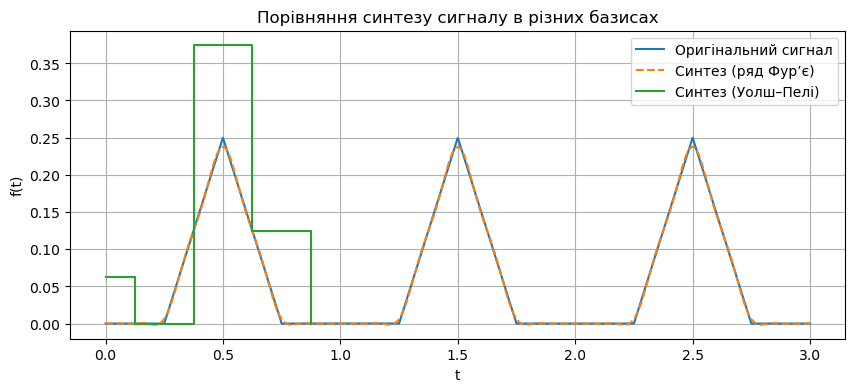

In [16]:
plt.figure(figsize=(10, 4))

# Оригінальний сигнал
plt.plot(t, y, label="Оригінальний сигнал")

# Фур’є
plt.plot(t, y_fourier, '--', label="Синтез (ряд Фур’є)")

# Уолш–Пелі (дискретний)
plt.step(
    t_w,
    y_walsh,
    where='post',
    label="Синтез (Уолш–Пелі)"
)

plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Порівняння синтезу сигналу в різних базисах")
plt.legend()
plt.grid(True)
plt.show()

## Завдання 3

### Вибір норми похибки

Для оцінки якості апроксимації використаємо евклідову норму (L2-норму),
яка визначається як:

$$
\|e\|_2 = \sqrt{\sum_{i=1}^{M} (f_i - \hat{f}_i)^2},
$$

де $( f_i $) — значення вихідного сигналу,
а $( \hat{f}_i $) — значення синтезованого сигналу.


### Похибка для тригонометричного ряду Фур’є

In [17]:
error_fourier = np.linalg.norm(y - y_fourier)

print(f"Норма похибки (ряд Фур’є, N = {N}): {error_fourier:.6f}")

Норма похибки (ряд Фур’є, N = 8): 0.096035


### Похибка для базису Уолша–Пелі

In [18]:
error_walsh = np.linalg.norm(f_w - y_walsh)

print(f"Норма похибки (Уолш–Пелі, N = {n}): {error_walsh:.6f}")

Норма похибки (Уолш–Пелі, N = 8): 0.312500


### Порівняння

Отримані значення норм похибок дозволяють порівняти
якість апроксимації сигналу різними базисами.

## Загальний висновок

У ході виконання лабораторної роботи було досліджено періодичний сигнал
та реалізовано його синтез у різних ортогональних базисах.
Було побудовано вихідний сигнал, виконано його розклад
у тригонометричний ряд Фур’є та у базис Уолша–Пелі,
а також здійснено відновлення сигналу за обмеженою кількістю гармонік.

Отримані результати дозволили наочно порівняти якість апроксимації
сигналу різними методами. Зокрема, було показано, що
тригонометричний ряд Фур’є забезпечує більш гладке та точне
наближення періодичного сигналу, тоді як базис Уолша–Пелі
формує кусочно-постійну апроксимацію.

## Контрольні запитання

### Як впливає симетрія періодичного сигналу (парна, непарна, відсутність симетрії) на структуру його тригонометричного ряду Фур’є? Наведіть приклади коефіцієнтів $(a_k)$та $(b_k)$, які стають нульовими у кожному випадку.

Якщо сигнал є парним, то в його тригонометричному ряді Фур’є
коефіцієнти при синусах дорівнюють нулю, тобто $( b_k = 0 $),
і ряд містить лише косинусні складові.

Якщо сигнал є непарним, то коефіцієнти при косинусах дорівнюють нулю,
тобто $( a_k = 0 $), і ряд містить лише синусні складові.

Якщо сигнал не має симетрії, то в ряді Фур’є присутні як
косинусні, так і синусні складові.

### Чому для апроксимації прямокутного імпульсу базис Уолша–Пелі часто забезпечує меншу похибку порівняно з базисом Фур’є при однаковій кількості базисних функцій? Поясніть з точки зору властивостей базисних функцій.
Базис Уолша–Пелі складається з кусочно-постійних функцій, які добре узгоджуються з формою прямокутного імпульсу.
Тому для сигналів із різкими переходами апроксимація в базисі Уолша–Пелі може бути точнішою, ніж у тригонометричному базисі Фур’є, який складається з гладких синусоїд.

### Як пов’язані між собою три форми ряду Фур’є (тригонометрична, амплітудно-фазова, комплексна)?
Тригонометрична, амплітудно-фазова та комплексна форми ряду Фур’є є різними записами одного й того самого розкладу.

За коефіцієнтами $( a_k )$ і $( b_k )$ можна обчислити амплітуду $( A_k = \sqrt{a_k^2 + b_k^2} )$
та фазу $( \varphi_k )$.

Комплексні коефіцієнти $( c_k )$ визначаються через ті самі коефіцієнти і використовуються
в комплексній формі ряду Фур’є.

### Що таке узагальнений ряд Фур’є? Наведіть умови, за яких система функцій є ортонормованою, і поясніть, чому це важливо для розкладу сигналу.
Узагальнений ряд Фур’є — це розклад сигналу за довільною системою ортонормованих базисних функцій.
Система функцій є ортонормованою, якщо вони ортогональні та мають одиничну норму.
Це важливо, оскільки ортонормованість забезпечує незалежність коефіцієнтів розкладу та спрощує обчислення і синтез сигналу.
